In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import plotly.express as px

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo

apartment_for_rent_classified = fetch_ucirepo(id=555)

X = apartment_for_rent_classified.data.features
y = apartment_for_rent_classified.data.targets # <-- empty, we need to set it

print(apartment_for_rent_classified.metadata)

print(apartment_for_rent_classified.variables)

DatasetNotFoundError: Error reading data csv file for "Apartment for Rent Classified" dataset (id=555).

In [ ]:
X

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1,1,USD,No,Thumbnail,Cats,...,2195,Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1.577360e+09
1,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3,USD,No,Thumbnail,"Cats,Dogs",...,1250,Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1.577360e+09
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
3,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1,2,USD,No,Thumbnail,"Cats,Dogs",...,1600,Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1.577360e+09
4,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1,1,USD,No,Thumbnail,"Cats,Dogs",...,975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1.577360e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,NaN,...,780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1.544186e+09
99822,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,"Cats,Dogs",...,813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1.544186e+09
99823,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,"Cats,Dogs",...,1325,Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1.544186e+09
99824,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,"Cats,Dogs",...,931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1.544186e+09


### Exploring Data

In [ ]:
(X.isna().sum() / len(X)).sort_values(ascending=False)

,0
address,0.920401
pets_allowed,0.607397
amenities,0.161050
state,0.003055
cityname,0.003055
bedrooms,0.001272
bathrooms,0.000661
longitude,0.000311
latitude,0.000291
time,0.000060


In [ ]:
X[['price']].describe()

,price
count,99821.000000
mean,1527.208493
std,903.635759
min,100.000000
25%,1014.000000
50%,1350.000000
75%,1795.000000
max,52500.000000


In [ ]:
X.groupby('state').size().sort_values(ascending=False).reset_index(name='count')

,state,count
0,TX,11279
1,CA,10341
2,VA,8305
3,NC,6308
4,CO,6295
5,FL,5788
6,MD,5309
7,MA,5041
8,OH,4911
9,GA,4790


In [ ]:
texas = X[X['state'] == 'TX']
print(f"Texas: {texas[['price']].describe()}")

cal = X[X['state'] == 'CA']
print(f"California: {cal[['price']].describe()}")

Texas:               price
count  11279.000000
mean    1218.036351
std      415.405083
min      300.000000
25%      925.000000
50%     1140.000000
75%     1419.500000
max     4900.000000
California:               price
count  10341.000000
mean    2463.772749
std     1707.777753
min      493.000000
25%     1675.000000
50%     2195.000000
75%     2810.000000
max    52500.000000


In [ ]:
def filter_by_location(df, state, city = None):

  if city is not None:
    df = df[(df['state'] == state) & (df['cityname'] == city)]

  if city is None:
    df = df[df['state'] == state]

  return df

In [ ]:
charlotte = filter_by_location(X,'NC', 'Charlotte')
charlotte.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
217,housing/rent/apartment,Two BR 5300 Montague St,"This unit is located at 5300 Montague St, Char...","Dishwasher,Parking,Patio/Deck,Pool,Refrigerator",2,2,USD,No,Thumbnail,NaN,...,1010,Monthly,1100,5300 Montague St,Charlotte,NC,35.2016,-80.8124,RentLingo,1.577359e+09
226,housing/rent/apartment,Three BR 9524 Foggy Meadow Road,This unit is located at 9524 Foggy Meadow Road...,Pool,2,3,USD,No,Thumbnail,"Cats,Dogs",...,1499,Monthly,1665,9524 Foggy Meadow Rd,Charlotte,NC,35.2016,-80.8124,RentLingo,1.577358e+09
296,housing/rent/apartment,Three BR 11712 Rimrock Canyon Drive,This unit is located at 11712 Rimrock Canyon D...,NaN,2,3,USD,No,Thumbnail,"Cats,Dogs",...,1599,Monthly,1413,11712 Rimrock Canyon Dr,Charlotte,NC,35.2016,-80.8124,RentLingo,1.577359e+09
721,housing/rent/apartment,Four BR 6638 Brunning Glen Court,This unit is located at 6638 Brunning Glen Cou...,NaN,3,4,USD,No,Thumbnail,"Cats,Dogs",...,1799,Monthly,2106,6638 Brunning Glen CT,Charlotte,NC,35.2016,-80.8124,RentLingo,1.577359e+09
898,housing/rent/apartment,Three BR 744 Wilderness Trail Drive,This unit is located at 744 Wilderness Trail D...,NaN,2,3,USD,No,Thumbnail,"Cats,Dogs",...,1299,Monthly,1604,744 Wilderness Trail Dr,Charlotte,NC,35.2016,-80.8124,RentLingo,1.577358e+09


In [ ]:
all_NC = filter_by_location(X,'NC')
all_NC.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
2,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2,3,USD,No,Thumbnail,NaN,...,1395,Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577360e+09
47,housing/rent/apartment,Three BR 5206 Moonlight Drive Trail Sw,This unit is located at 5206 Moonlight Drive T...,"Dishwasher,Garbage Disposal,Patio/Deck,Refrige...",2,3,USD,No,Thumbnail,"Cats,Dogs",...,1299,Monthly,1119,5206 Moonlight Dr Trail SW,Concord,NC,35.4047,-80.6098,RentLingo,1.577359e+09
68,housing/rent/apartment,Studio apartment 4016 Twickenham Court,"This unit is located at 4016 Twickenham Court,...","Cable or Satellite,Clubhouse,Dishwasher,Garbag...",1,2,USD,No,Thumbnail,"Cats,Dogs",...,777,Monthly,563,4016 Twickenham CT,Raleigh,NC,35.8230,-78.6438,RentLingo,1.577358e+09
216,housing/rent/apartment,One BR 4531 Langdon Drive,"This unit is located at 4531 Langdon Drive, Mo...","Dishwasher,Garbage Disposal,Parking,Patio/Deck...",1,1,USD,No,Thumbnail,"Cats,Dogs",...,1211,Monthly,866,4531 Langdon Dr,Morrisville,NC,35.8269,-78.8335,RentLingo,1.577359e+09
217,housing/rent/apartment,Two BR 5300 Montague St,"This unit is located at 5300 Montague St, Char...","Dishwasher,Parking,Patio/Deck,Pool,Refrigerator",2,2,USD,No,Thumbnail,NaN,...,1010,Monthly,1100,5300 Montague St,Charlotte,NC,35.2016,-80.8124,RentLingo,1.577359e+09


In [ ]:
# may not be totally necessary, but helps to standarize text data in a column
# also can be helpful if we decide to do any further NLP

st = PorterStemmer()

def stem_column(df, column, processed_column):
  df[processed_column] = df[column].str.replace('[^\w\s]+', '',regex=True)

  df[processed_column] = df[processed_column].apply(
    lambda x: ' ' .join([x for x in x.split() if x not in (stop)]))

  df[processed_column] = df[processed_column].str.lower()

  st = PorterStemmer()

  df[processed_column] = df[processed_column].apply(
    lambda x: ' '.join(st.stem(word) for word in x.split()))

  return df

In [ ]:
X = stem_column(X, 'body', 'processed_body')

In [ ]:
print(X['body'][0])
print(X['processed_body'][0])

This unit is located at 507 & 509 Esplanade, Redondo Beach, 90277, CAMonthly rental rates range from $2195We have 1 beds units available for rent
thi unit locat 507 509 esplanad redondo beach 90277 camonthli rental rate rang 2195we 1 bed unit avail rent


In [ ]:
luxury_charlotte = charlotte[charlotte['processed_body'].str.contains('luxuri')]
luxury_charlotte.head()

KeyError: 'processed_body'

In [ ]:
luxury_charlotte[['price']].describe()

In [ ]:
(2473.000000-1267.534954) / 295.297101

In [ ]:
def scatter_plot(df, long, lat, color_col):
    fig = px.scatter(df, x=long, y=lat, color=color_col,color_continuous_scale='rainbow')
    fig.show()

In [ ]:
scatter_plot(luxury_charlotte, long='longitude', lat='latitude', color_col='price')

In [ ]:
scatter_plot(all_NC, long='longitude', lat='latitude', color_col='price')

In [ ]:
# apply KNN


### Feature Cleaning

In [ ]:
apartments = X

Remove Irrelevant Columns

In [ ]:
apartments = apartments.drop(['fee', 'has_photo', 'source', 'time', 'address', 'currency'], axis=1)

Remove Non Apartments

In [ ]:
apartments = apartments[apartments['category'] != 'Gym']
apartments = apartments[apartments['category'] != 'Parking,Patio/Deck']
apartments = apartments[apartments['category'] != '2']

In [ ]:
apartments['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

Making Binary Pets Variable

In [ ]:
apartments['pets_allowed'].unique()

array(['Cats', 'Cats,Dogs', nan, 'Dogs', 'Cats,Dogs,None'], dtype=object)

In [ ]:
apartments['pets?'] = np.where(apartments['pets_allowed'].isin(['Cats','Cats,Dogs','Dogs','Cats,Dogs,None']), '1', '0')
apartments = apartments.drop('pets_allowed', axis =1)

<ipython-input-12-0e72fb0efb21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartments['pets?'] = np.where(apartments['pets_allowed'].isin(['Cats','Cats,Dogs','Dogs','Cats,Dogs,None']), '1', '0')


In [ ]:
apartments['pets?'].unique()

array(['1', '0'], dtype=object)

Bedrooms Cleaning

In [ ]:
apartments['bedrooms'].unique()

array(['1', '3', '2', '4', '0', '5', '7', '8', nan, '6', '9', 2.0, 3.0,
       1.0, 4.0, 5.0, 0.0, 6.0], dtype=object)

In [ ]:
apartments = apartments.dropna(subset=['bedrooms'])

In [ ]:
apartments['bedrooms'] = apartments['bedrooms'].astype(int)

<ipython-input-16-72cd0ff646ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartments['bedrooms'] = apartments['bedrooms'].astype(int)


In [ ]:
apartments['bedrooms'].unique()

array([1, 3, 2, 4, 0, 5, 7, 8, 6, 9])

Bathroom Cleaning

In [ ]:
apartments['bathrooms'].unique()

array(['1', '1.5', '2', '2.5', '3', '3.5', '4', '7', '4.5', nan, '5', '8',
       '8.5', '6', '5.5', '9', '7.5', 1.0, 2.0, 2.5, 1.5, 4.0, 3.0, 3.5,
       4.5], dtype=object)

In [ ]:
apartments = apartments.dropna(subset=['bathrooms'])

In [ ]:
apartments['bathrooms'] = apartments['bathrooms'].astype('float64')

In [ ]:
apartments['bathrooms'].unique()

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 7. , 4.5, 5. , 8. , 8.5, 6. ,
       5.5, 9. , 7.5])

Latitude and Longitude Cleaning

In [ ]:
apartments = apartments.dropna(subset=['latitude', 'longitude'])

SQFT Cleaning

In [ ]:
apartments['square_feet'] = apartments['square_feet'].astype(int)

Missing Values

In [ ]:
apartments.describe(include='all')

,category,title,body,amenities,bathrooms,bedrooms,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,pets?
count,99609,99609,99609,83617,99609.000000,99609.000000,99608.000000,99608,99609,99609.000000,99336,99336,99609.000000,99609.000000,99609
unique,7,58505,94607,9819,NaN,NaN,NaN,4543,2,NaN,2979,51,NaN,NaN,2
top,housing/rent/apartment,Apartment in great location,"When searching for a pet-friendly One-, Two- a...",Parking,NaN,NaN,NaN,1350,Monthly,NaN,Dallas,TX,NaN,NaN,0
freq,99549,1063,45,6195,NaN,NaN,NaN,567,99606,NaN,2858,11258,NaN,NaN,60475
mean,NaN,NaN,NaN,NaN,1.445768,1.728278,1527.486627,NaN,NaN,956.050538,NaN,NaN,36.949838,-91.549023,NaN
std,NaN,NaN,NaN,NaN,0.546963,0.748567,899.155951,NaN,NaN,365.178433,NaN,NaN,4.599551,15.812700,NaN
min,NaN,NaN,NaN,NaN,1.000000,0.000000,100.000000,NaN,NaN,107.000000,NaN,NaN,19.573800,-159.369800,NaN
25%,NaN,NaN,NaN,NaN,1.000000,1.000000,1015.000000,NaN,NaN,730.000000,NaN,NaN,33.746500,-104.791900,NaN
50%,NaN,NaN,NaN,NaN,1.000000,2.000000,1350.000000,NaN,NaN,900.000000,NaN,NaN,37.231000,-84.551800,NaN
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,1795.000000,NaN,NaN,1116.000000,NaN,NaN,39.953900,-77.576700,NaN


In [ ]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99609 entries, 0 to 99825
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category       99609 non-null  object 
 1   title          99609 non-null  object 
 2   body           99609 non-null  object 
 3   amenities      83617 non-null  object 
 4   bathrooms      99609 non-null  float64
 5   bedrooms       99609 non-null  int64  
 6   price          99608 non-null  float64
 7   price_display  99608 non-null  object 
 8   price_type     99609 non-null  object 
 9   square_feet    99609 non-null  int64  
 10  cityname       99336 non-null  object 
 11  state          99336 non-null  object 
 12  latitude       99609 non-null  float64
 13  longitude      99609 non-null  float64
 14  pets?          99609 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 12.2+ MB


In [ ]:
 apartments.isnull().sum()

,0
category,0
title,0
body,0
amenities,15992
bathrooms,0
bedrooms,0
price,1
price_display,1
price_type,0
square_feet,0


### Testing K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
train_kmeans = apartments[['bedrooms', 'bathrooms', 'square_feet', 'pets?', 'latitude', 'longitude' ]]
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_kmeans)

In [ ]:
kmeans = KMeans(n_clusters=50, random_state=42, n_init='auto')
apartments['cluster'] = kmeans.fit_predict(train_scaled)

In [ ]:
print(apartments['cluster'].value_counts())

cluster
3     7139
14    6077
29    4171
7     3971
33    3820
17    3757
44    3731
15    3693
30    3350
4     3258
34    3135
13    3107
2     3081
24    2985
36    2973
26    2409
0     2190
1     2150
16    2025
6     1947
31    1893
20    1722
47    1633
40    1607
25    1493
11    1421
9     1407
42    1369
38    1366
8     1268
43    1170
39    1170
21    1148
19    1116
35    1097
32    1045
49     934
48     898
23     888
22     773
10     681
5      656
18     638
27     637
45     619
37     587
46     580
41     508
12     277
28      39
Name: count, dtype: int64


### Test KNN

In [ ]:
from sklearn import datasets
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [ ]:
apartments['target'] = 1

In [ ]:
knn_dataset = apartments[['bedrooms', 'bathrooms', 'square_feet', 'pets?', 'latitude', 'longitude']]

In [ ]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(knn_dataset)
distances, indices = nbrs.kneighbors(np.array([[2, 1, 1000, 1, 35.227085, -80.843124]]))

print("Indices of nearest neighbors:")
print(indices)
print("Distances to nearest neighbors:")
print(distances)

Indices of nearest neighbors:
[[69787 99591 87027]]
Distances to nearest neighbors:
[[1.00467355 1.14324603 1.41469004]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


What are the Nearest Neighbors

In [ ]:
# Looping through the index
for index in indices:
    # Accessing data by index
    row = apartments.loc[index]
    title = apartments.loc[index, 'title']

    # Process the row data as needed
    print(f"Index: {index}")
    print(title)
   # print(f"Row data:\n{row}")

Index: [69787 99591 87027]
69787            Fairfax, prime location One BR, Apartment
99591    Two BA \ 997 sq. ft. - in a great area. Parkin...
87027                Beautiful Pasadena Apartment for rent
Name: title, dtype: object


### Test KNN with only Charlotte

In [ ]:
from sklearn import datasets
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [ ]:
apartments['target'] = 1

In [ ]:
knn_cha_dataset = cha[['bedrooms', 'bathrooms', 'square_feet', 'pets?', 'latitude', 'longitude']]

In [ ]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(knn_cha_dataset)
distances, indices = nbrs.kneighbors(np.array([[2, 1, 1000, 1, 35.227085, -80.843124]]))

print("Indices of nearest neighbors:")
print(indices)
print("Distances to nearest neighbors:")
print(distances)

KeyError: 1

What are the Nearest Neighbors

In [ ]:
# Looping through the index
for index in indices:
    # Accessing data by index
    row = apartments.loc[index]
    title = apartments.loc[index, 'title']

    # Process the row data as needed
    print(f"Index: {index}")
    print(title)
   # print(f"Row data:\n{row}")

Index: [ 791  837 1093]
791           Three BR 265 Tennyson Avenue
837     One BR 2031 Market Street Unit 116
1093       Two BR 432 Edgehill Ln. Unit 36
Name: title, dtype: object


### Filtering to Charlotte only and running KMeans again


In [ ]:
cha = filter_by_location(apartments, 'NC', 'Charlotte')
cha = cha[['bedrooms','bathrooms', 'square_feet', 'latitude', 'longitude', 'pets?','price']]
cha

,bedrooms,bathrooms,square_feet,latitude,longitude,pets?,price
217,2,2.0,1100,35.2016,-80.8124,0,1010.0
226,3,2.0,1665,35.2016,-80.8124,1,1499.0
296,3,2.0,1413,35.2016,-80.8124,1,1599.0
721,4,3.0,2106,35.2016,-80.8124,1,1799.0
898,3,2.0,1604,35.2016,-80.8124,1,1299.0
...,...,...,...,...,...,...,...
99048,1,1.0,622,35.1962,-80.8287,0,1000.0
99050,3,2.0,1208,35.1943,-80.8266,1,1934.0
99051,2,2.0,1016,35.2016,-80.8124,1,1118.0
99057,1,1.0,777,35.2145,-80.8281,1,1269.0


In [ ]:
# did not standardize bedrooms, bathrooms, and pets to see impact on results
cha[['square_feet', 'latitude', 'longitude','price']] = scaler.fit_transform(cha[['square_feet', 'latitude', 'longitude','price']])
cha

,bedrooms,bathrooms,square_feet,latitude,longitude,pets?,price
217,2,2.0,0.345557,0.180898,0.288135,0,-0.792050
226,3,2.0,2.151281,0.180898,0.288135,1,0.605449
296,3,2.0,1.345897,0.180898,0.288135,1,0.891237
721,4,3.0,3.560705,0.180898,0.288135,1,1.462811
898,3,2.0,1.956327,0.180898,0.288135,1,0.033875
...,...,...,...,...,...,...,...
99048,1,1.0,-1.182117,0.101098,0.066219,0,-0.820629
99050,3,2.0,0.690722,0.073021,0.094810,1,1.848624
99051,2,2.0,0.077096,0.180898,0.288135,1,-0.483400
99057,1,1.0,-0.686742,0.371531,0.074388,1,-0.051861


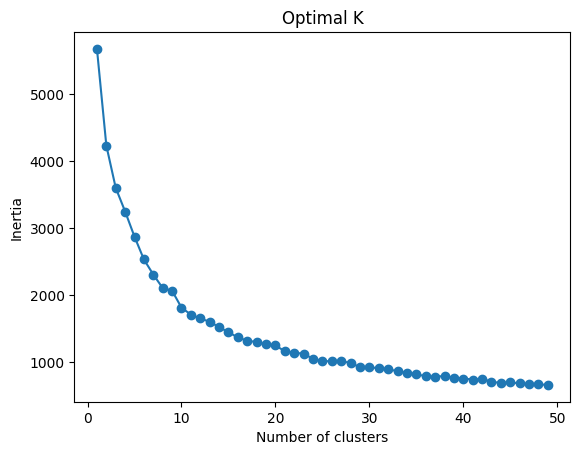

In [ ]:
inertias = []

for i in range(1,50):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cha)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,50), inertias, marker='o')
plt.title('Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans_2 = KMeans(n_clusters=20, init='random', random_state=0)

In [ ]:
cha['result'] = kmeans_2.fit_predict(cha)
cha

,bedrooms,bathrooms,square_feet,latitude,longitude,pets?,price,result
217,2,2.0,0.345557,0.180898,0.288135,0,-0.792050,1
226,3,2.0,2.151281,0.180898,0.288135,1,0.605449,15
296,3,2.0,1.345897,0.180898,0.288135,1,0.891237,15
721,4,3.0,3.560705,0.180898,0.288135,1,1.462811,13
898,3,2.0,1.956327,0.180898,0.288135,1,0.033875,15
...,...,...,...,...,...,...,...,...
99048,1,1.0,-1.182117,0.101098,0.066219,0,-0.820629,5
99050,3,2.0,0.690722,0.073021,0.094810,1,1.848624,9
99051,2,2.0,0.077096,0.180898,0.288135,1,-0.483400,1
99057,1,1.0,-0.686742,0.371531,0.074388,1,-0.051861,8


In [ ]:
cha.groupby('result').size().sort_values(ascending=False)

,0
result,
9,111
14,95
2,79
4,78
8,77
15,76
11,74
3,69
12,68


<Axes: xlabel='latitude', ylabel='longitude'>

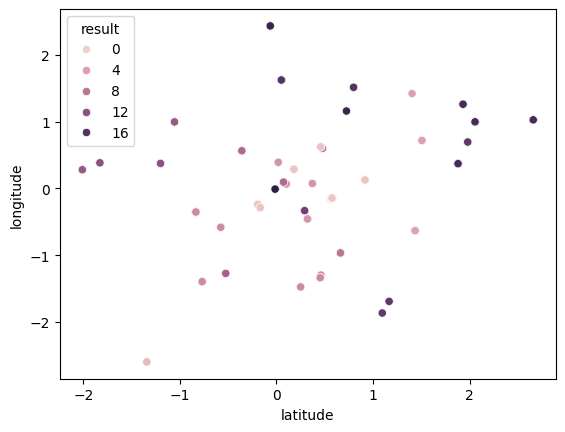

In [ ]:
import seaborn as sns

sns.scatterplot(data=cha, x='latitude', y='longitude', hue='result')

In [ ]:
most_common_result = cha[cha['result'] == 9]
most_common_result['description'] = apartments['processed_body']
most_common_result['amenities'] = apartments['amenities']

most_common_result.head()

<ipython-input-99-bd0486b0a0d1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-99-bd0486b0a0d1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,bedrooms,bathrooms,square_feet,latitude,longitude,pets?,price,result,description,amenities
3848,3,2.0,0.569275,0.180898,0.288135,1,1.036988,9,thi unit locat 1724 logi avenu charlott 28205 ...,"Dishwasher,Garbage Disposal,Patio/Deck,Refrige..."
53534,2,2.0,0.025960,0.477930,0.599906,0,0.788353,9,from award win artdeco inspir state art archit...,NaN
54818,1,1.0,-0.670762,0.562163,-0.158420,1,1.751456,9,leas inform leas length 12 mon incom requir mu...,Parking
56164,1,1.0,-0.763445,0.562163,-0.158420,0,1.065567,9,squar footag 753 sq feet unit number 1604 inco...,Parking
56741,2,2.0,0.246482,-0.834330,-0.353106,0,0.951252,9,squar footag 1069 sqft unit number 0329 offer ...,"Parking,Pool,Storage"


In [ ]:
# trying to determine similarites/dissimilarities among the cluster with most datapoints of which have
# the word 'luxuri' in the description
luxury_cha = most_common_result[most_common_result['description'].str.contains('luxuri')]
print(len(luxury_cha))
luxury_cha.head()

24


,bedrooms,bathrooms,square_feet,latitude,longitude,pets?,price,result,description,amenities
61960,2,2.0,0.431849,-2.010636,0.279966,0,1.671436,9,1000 off first month rent 3 bed take possess w...,"Clubhouse,Fireplace,Gym,Pool,Storage,TV"
63521,2,2.0,0.112251,0.291731,-0.332685,1,1.505679,9,youll find luxuri state art amen histor set so...,"Fireplace,Parking,Patio/Deck,Pool"
65016,2,2.0,0.323186,0.291731,-0.332685,1,0.716907,9,squar footag 1093 sqft unit number 02847 apart...,"Fireplace,Gym,Patio/Deck,Pool,Washer Dryer"
72325,2,2.0,0.310402,0.371531,0.074388,0,1.254187,9,squar footag 1089 sq feet unit number 655 our ...,NaN
72343,2,2.0,0.112251,0.291731,-0.332685,1,1.519969,9,squar footag 1027 sq feet unit number 180 at p...,"Fireplace,Parking,Patio/Deck,Pool"
